In [2]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Simulating Statistics 

In [2]:
united = Table().read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [4]:
type(united.item(0))

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


datascience.tables.Table

In [5]:
united.row(0)

Row(Date='6/1/15', Flight Number=73, Destination='HNL', Delay=257)

### Median time of all delays

In [6]:
np.median(united.column('Delay'))

2.0

In [9]:
np.mean(united.column('Delay'))

16.658155515370705

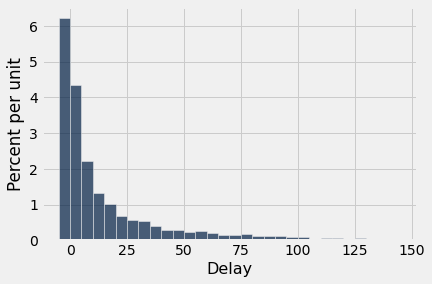

In [14]:
united.hist('Delay', bins=np.arange(-5, 150, 5))

In [ ]:
#height = % of data in the bin / width of the bin
.06 = x / 5

### Average time of 10 random delays

In [15]:
np.median(united.sample(10).column('Delay'))

-1.0

In [17]:
np.median(united.sample(10).column('Delay'))

4.0

#### Write a function that given a specified sample size called `size`, returns the statistic we are computing?


The statistic we are computing is the median of the samples

What type is `size` here?

In [23]:
def statistic_per_sample(size):
    return np.median(united.sample(size).column('Delay'))
statistic_per_sample(10)

1.0

In [25]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay')) 

<details>,
<summary>Solution</summary>
  np.median(united.sample(size).column('Delay'))
</details>


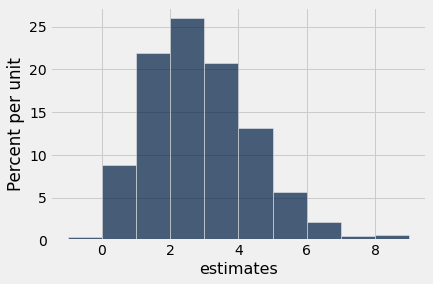

In [26]:
estimates = make_array()
size = 100
for _ in np.arange(1000):
    estimates = np.append(estimates, sample_median(size))
Table().with_column('estimates', estimates).hist()

In [27]:
_

999

In [28]:
for _ in np.arange(10):
    print(_)

0
1
2
3
4
5
6
7
8
9


#### Empirical Distributions Overlayed

In [29]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [30]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

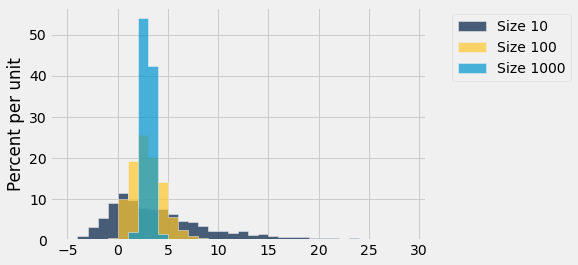

In [31]:
sample_medians.hist(bins = np.arange(-5, 30))

# Swain vs. Alabama


In [4]:
population_proportions = make_array(.26, .74)
population_proportions

array([0.26, 0.74])

In [11]:
sample_proportions(100, population_proportions)

array([0.2, 0.8])

In [12]:
def panel_proportion():
    '''Lets add this doc string
    What is this function doing?'''
    return sample_proportions(100, population_proportions).item(0)

In [28]:
panel_proportion() * 100

21.0

In [41]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

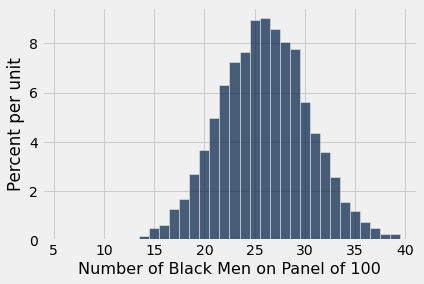

In [42]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

### Where is most of the data?

### What percent of our samples had just 8 black men?

*Hint: area of bin = % of data in our samples in the bin*

### Model Assesment:
Is the data consistent with the model of random sampling from the population of eligible jurors?

(back to slides)

# Mendel's Pea Flowers


In [ ]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

In [ ]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

In [ ]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [ ]:
purple_flowers()

In [ ]:
purple_flowers()

In [ ]:
purple_flowers()

In [ ]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

### Let's compute the distance

In [ ]:
abs(observed_purples * 100 - 75)

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_12_completed.ipynb", pdf=False)